<a href="https://colab.research.google.com/github/gansuhmgl/hello-world/blob/master/SS2021_seminar_3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [52]:
# Өгөгдөлөө бэлдье. 
# 100 shirheg X, y uusgey 
# [-0.5, 0.5], [0.5, -0.5] tseguudiig  toirson random tseguud 

n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)

x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))
print(y.shape)

(100,)


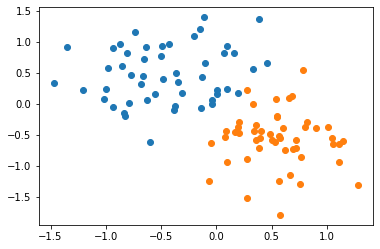

In [53]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [54]:
class LogisticRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2,1)

  def forward(self, x):
    y_pred = self.linear(x)
    y_pred = torch.sigmoid(y_pred)
    return y_pred
  
  def get_params(self):
    [w, b] = self.parameters()
    w1, w2 =w.view(2)
    return w1.item(), w2.item(), b.item()

  def plot_model(self, x, y):
    w1, w2, b = self.get_params()
    x1 = np.array([-2,2])
    x2 = (w1*x1 + b)/(-w2)
    plt.plot(x1, x2, 'r')
    
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])
    plt.show()

In [74]:
model = LogisticRegression()
model

LogisticRegression(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)

In [75]:
model.get_params()

(-0.42040327191352844, 0.606782078742981, 0.10552027821540833)

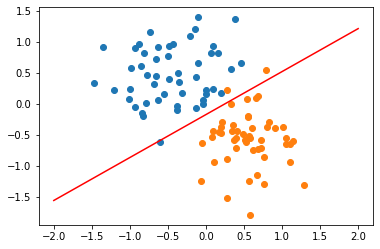

In [76]:
model.plot_model(X, y)

In [77]:
#model.plot_model(X, y)
y_pred = model.forward(x_data)
print(x_data[:5])
print(y_pred[:5])

tensor([[-0.1372, -0.0715],
        [ 0.8044, -0.3706],
        [-0.6022, -0.6194],
        [ 0.5709, -0.5120],
        [ 0.0064,  0.1533]])
tensor([[0.5299],
        [0.3876],
        [0.4957],
        [0.3905],
        [0.5488]], grad_fn=<SliceBackward>)


0 1.0030039548873901


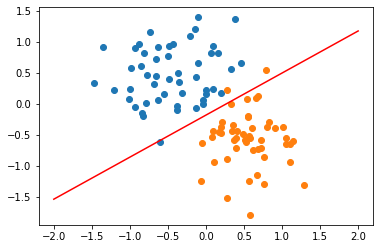

100 0.287952721118927


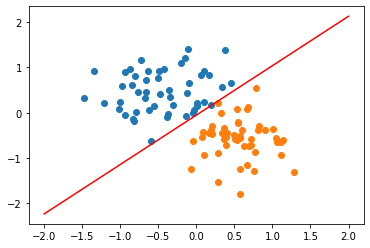

200 0.19464296102523804


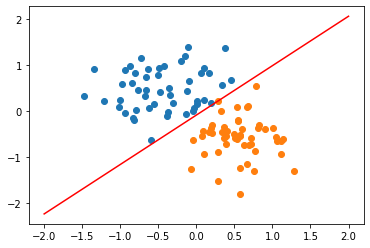

300 0.1567869633436203


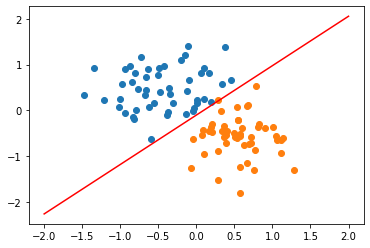

400 0.1352713406085968


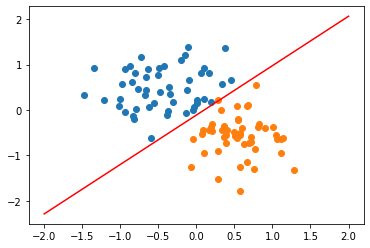

500 0.12098895758390427


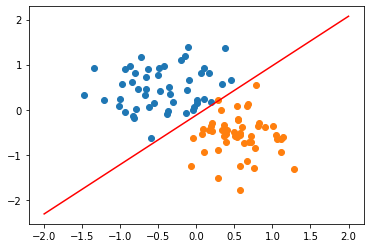

600 0.11062305420637131


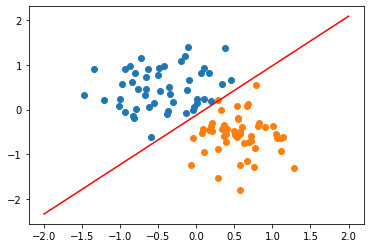

700 0.10265177488327026


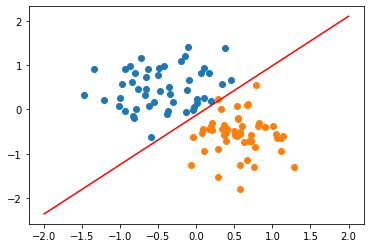

800 0.09626910090446472


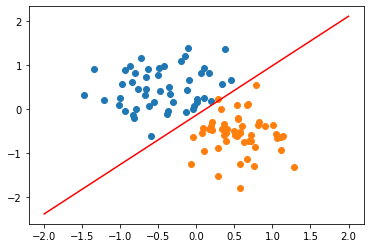

900 0.09100396931171417


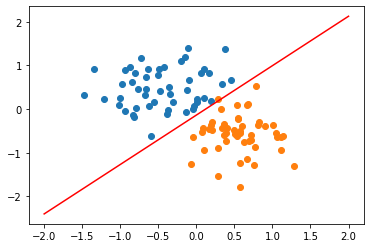

1000 0.08656051754951477


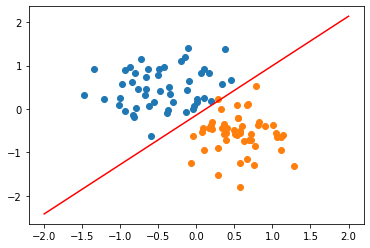

1100 0.08274242281913757


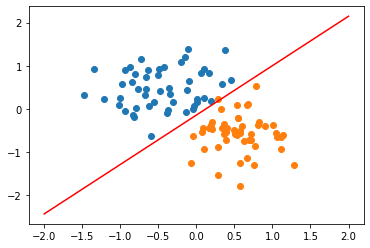

1200 0.07941357791423798


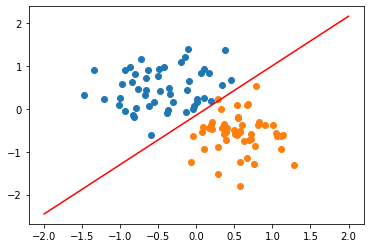

1300 0.07647623866796494


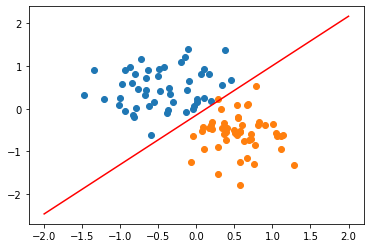

1400 0.07385819405317307


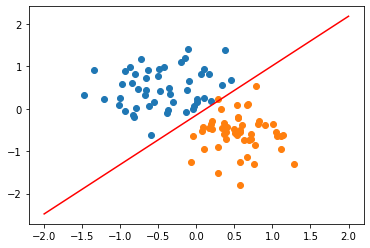

1500 0.07150471955537796


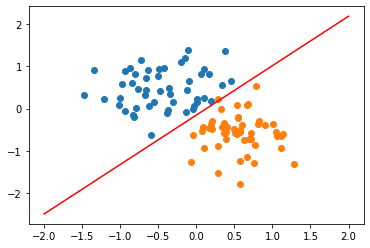

1600 0.0693734660744667


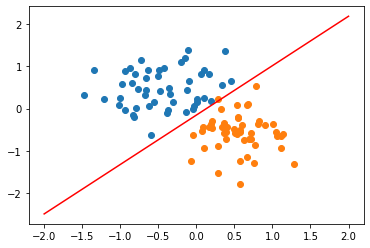

1700 0.06743104755878448


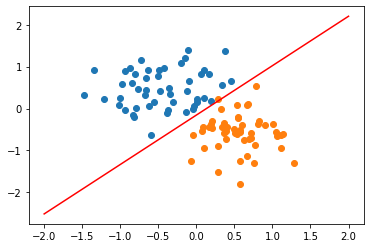

1800 0.06565092504024506


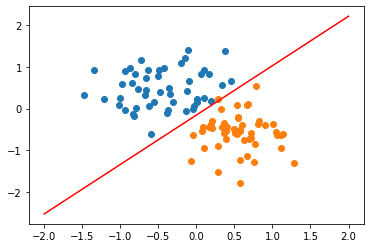

1900 0.06401139497756958


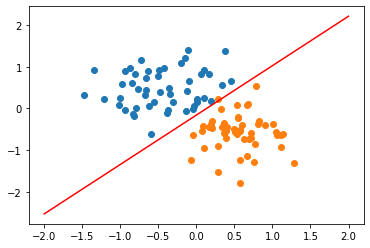

In [78]:
# # Загвараа сургая

optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
epoch = 2000
losses = list()
BCEL = nn.BCELoss()

for i in range(epoch):
  y_pred = model.forward(x_data)
  S = BCEL(y_pred, y_data)

  optimizer.zero_grad()
  S.backward()
  optimizer.step()

  losses.append(S.item())

  if i % 100 == 0:
    print(i, S.item())
    model.plot_model(X, y)

